In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv_imshow

In [3]:
img = cv.imread('/content/gdrive/MyDrive/MachineVision/National_Theater.jpg')
img = cv.resize(img,(int(1008),int(756)))

In [4]:
blur3 = cv.blur(img, ksize=(3,3))
blur5 = cv.blur(img, ksize=(5,5))
blur7 = cv.blur(img, ksize=(7,7))

In [5]:
cv_imshow(img)
cv_imshow(blur3)
cv_imshow(blur5)
cv_imshow(blur7)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Scaled.jpg', img)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result3.jpg', blur3)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result5.jpg', blur5)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result7.jpg', blur7)

True

In [7]:
detail3 = np.int32(img) - np.int32(blur3)
detail5 = np.int32(img) - np.int32(blur5)
detail7 = np.int32(img) - np.int32(blur7)

In [8]:
shapened_img_blur3_sharpen2 = np.int32(img) + 2*detail3
shapened_img_blur3_sharpen5 = np.int32(img) + 5*detail3
shapened_img_blur3_sharpen10 = np.int32(img) + 10*detail3

cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result3_sharpen2.jpg', shapened_img_blur3_sharpen2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result3_sharpen5.jpg', shapened_img_blur3_sharpen5)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result3_sharpen10.jpg', shapened_img_blur3_sharpen10)

True

In [9]:
shapened_img_blur5_sharpen2 = np.int32(img) + 2*detail5
shapened_img_blur5_sharpen5 = np.int32(img) + 5*detail5
shapened_img_blur5_sharpen10 = np.int32(img) + 10*detail5

cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result5_sharpen2.jpg', shapened_img_blur5_sharpen2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result5_sharpen5.jpg', shapened_img_blur5_sharpen5)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result5_sharpen10.jpg', shapened_img_blur5_sharpen10)

True

In [10]:
shapened_img_blur7_sharpen2 = np.int32(img) + 2*detail7
shapened_img_blur7_sharpen5 = np.int32(img) + 5*detail7
shapened_img_blur7_sharpen10 = np.int32(img) + 10*detail7

cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result7_sharpen2.jpg', shapened_img_blur7_sharpen2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result7_sharpen5.jpg', shapened_img_blur7_sharpen5)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/result7_sharpen10.jpg', shapened_img_blur7_sharpen10)

True

In [11]:
kernel1d = cv.getGaussianKernel(7,2)
kernel2d = np.outer(kernel1d, kernel1d.transpose())

In [12]:
print(kernel1d.shape)
print(kernel2d.shape)

(7, 1)
(7, 7)


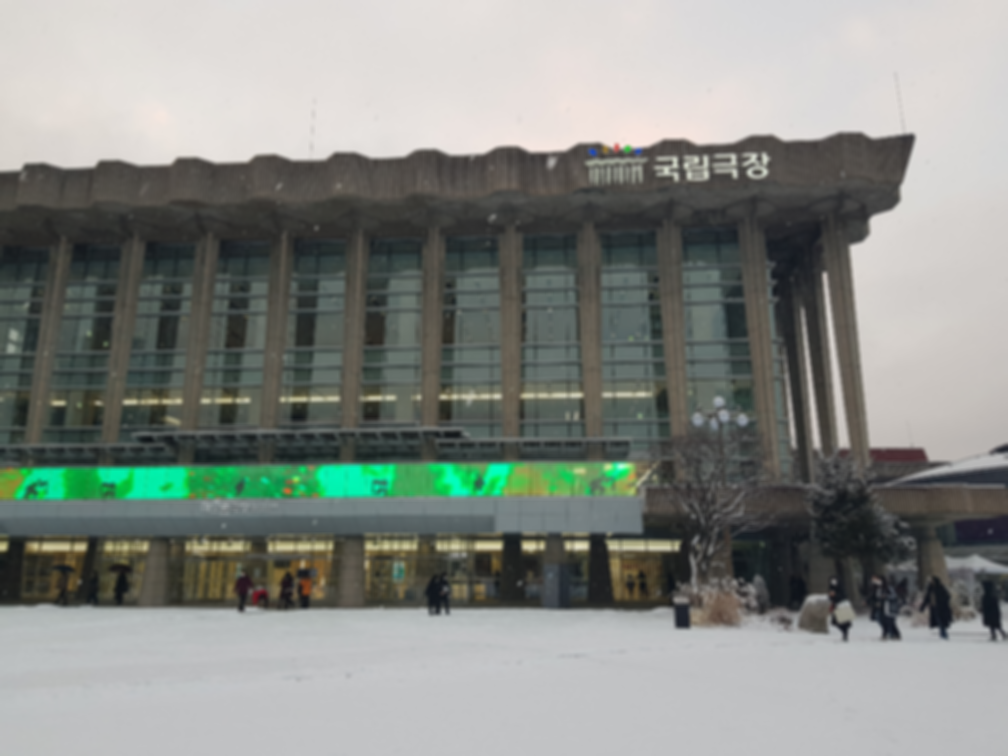

In [13]:
gauss2d = cv.filter2D(img, -1, kernel2d)
cv_imshow(gauss2d)

In [14]:
print(img.size)
print(gauss2d.size)

2286144
2286144


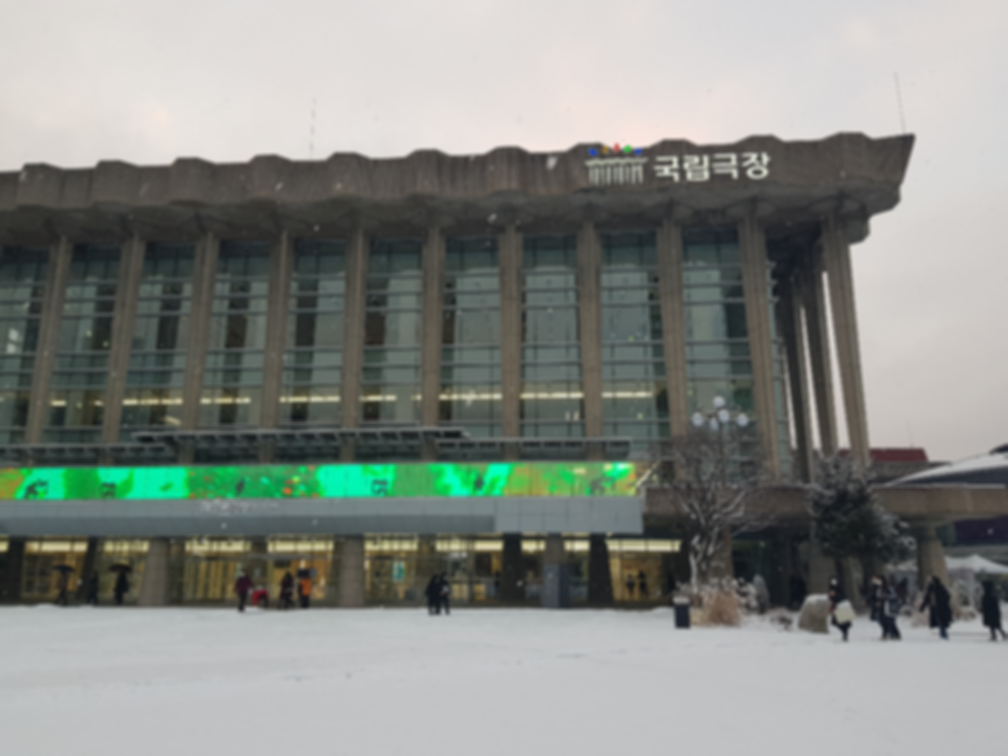

In [15]:
temp = cv.filter2D(img, -1, kernel1d)
gauss1d = cv.filter2D(temp, -1, kernel1d.transpose())
cv_imshow(gauss1d)

In [16]:
import math
mse = np.mean((gauss1d - gauss2d)**2)
print("mse :",mse)
print('psnr:' ,20 * math.log10(255 / math.sqrt(mse)) )

mse : 0.0924863000755858
psnr: 58.47002955071836


In [17]:
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/gauss2d.jpg', gauss2d)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/HW2_result/gauss1d.jpg', gauss1d)

True

In [18]:
def addsaltandpeppernoise(image,ratio):
  row,col,ch = image.shape
  out = np.copy(image)

  num_salt = np.ceil(image.size *ratio)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  out[coords]= 255

  num_pepper = np.ceil(image.size *ratio)
  coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
  out[coords]= 0
  return out

In [19]:
sp1 = addsaltandpeppernoise(img, ratio = 0.02)
sp2 = addsaltandpeppernoise(img, ratio = 0.1)
sp3 = addsaltandpeppernoise(img, ratio = 0.25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


In [20]:
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp002.jpg', sp1)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp01.jpg', sp2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp025.jpg', sp3)

True

In [21]:
cv_imshow(sp1)
cv_imshow(sp2)
cv_imshow(sp3)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
def psnr(img1, img2):
  mse = np.mean((img1 - img2)**2)
  print("mse :",mse)
  print('psnr:' ,20 * math.log10(255 / math.sqrt(mse)) )

In [26]:
median_sp1 = cv.medianBlur(sp1, ksize= 3)
psnr(img, median_sp1)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp002_3.jpg', cv.medianBlur(sp1, ksize= 3))
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp002_5.jpg', cv.medianBlur(sp1, ksize= 5))
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp002_7.jpg', cv.medianBlur(sp1, ksize= 7))

mse : 19.855471483861034
psnr: 35.152001566798944


True

In [34]:
median_sp2 = cv.medianBlur(sp2, ksize= 11)
psnr(img, median_sp2)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp01_3.jpg', cv.medianBlur(sp2, ksize= 3))
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp01_7.jpg', cv.medianBlur(sp2, ksize= 7))
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp01_11.jpg', cv.medianBlur(sp2, ksize= 11))

mse : 32.506757229640826
psnr: 33.01106713042511


True

In [35]:
median_sp3 = cv.medianBlur(sp3, ksize= 19)
psnr(img, median_sp3)
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp025_3.jpg', cv.medianBlur(sp3, ksize= 3))
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp025_11.jpg', cv.medianBlur(sp3, ksize= 11))
cv.imwrite('/content/gdrive/MyDrive/MachineVision/National_Theater_Sp025_21.jpg', cv.medianBlur(sp3, ksize= 21))

mse : 37.748032494890964
psnr: 32.361860406346274


True